In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
from matplotlib import dates
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from matplotlib import dates

In [3]:
df_test = pd.read_csv('test.csv',encoding='euc-kr')
df_train = pd.read_csv('train.csv',encoding='euc-kr')

In [4]:
df_test['split'] = 'test'
df_train['split'] = 'train'
print('train shape : {}, test shape : {}'.format(df_train.shape,df_test.shape),end='\n\n')

df = pd.concat([df_test,df_train],ignore_index=True)
df

train shape : (282451, 17), test shape : (139119, 16)



,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,split,Weekly_Sales
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,test,NaN
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,test,NaN
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,test,NaN
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638,test,NaN
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,27,18,2012-10-19,False,56.53,4.153,2639.32,NaN,4.77,575.48,3147.23,142.863363,8.000,A,204184,train,20775.91
421566,39,36,2010-05-21,False,76.67,2.826,NaN,NaN,NaN,NaN,NaN,209.392294,8.464,A,184109,train,5350.00
421567,14,29,2010-04-30,False,53.15,2.921,NaN,NaN,NaN,NaN,NaN,181.662036,8.899,A,200898,train,10939.87
421568,15,90,2011-07-01,False,67.43,3.916,NaN,NaN,NaN,NaN,NaN,135.446800,7.806,B,123737,train,5013.89


In [5]:
# transform into int
df.loc[:,'IsHoliday'] = df['IsHoliday'].astype(int)
df.loc[:,'IsHoliday'] = df.loc[:,'IsHoliday'].astype('category')
print(df['IsHoliday'].unique(),df['IsHoliday'].nunique())

[0, 1]
Categories (2, int64): [0, 1] 2


In [6]:
df.loc[:,'Date'] = pd.to_datetime(df['Date']) 

In [7]:
to_date = df['Date'].copy()
df_date = pd.concat([to_date.dt.year,to_date.dt.month,to_date.dt.day,to_date.dt.isocalendar().week],axis=1,ignore_index=True)
df_date.columns = ['year','month','day','weekofyear']
df_date 

,year,month,day,weekofyear
0,2012,1,6,1
1,2012,3,9,10
2,2011,5,27,21
3,2010,3,12,10
4,2010,10,29,43
...,...,...,...,...
421565,2012,10,19,42
421566,2010,5,21,20
421567,2010,4,30,17
421568,2011,7,1,26


In [8]:
def encode_sin_cos(df,col_n,max_val):
    df[col_n+'_sin'] = np.sin(2*np.pi*df[col_n]/max_val)
    df[col_n+'_cos'] = np.cos(2*np.pi*df[col_n]/max_val)
    
    return df

data_sin_cos = encode_sin_cos(df_date.copy(),'month',12)
data_sin_cos = encode_sin_cos(data_sin_cos,'day',31)

data_sin_cos

,year,month,day,weekofyear,month_sin,month_cos,day_sin,day_cos
0,2012,1,6,1,0.500000,8.660254e-01,0.937752,0.347305
1,2012,3,9,10,1.000000,6.123234e-17,0.968077,-0.250653
2,2011,5,27,21,0.500000,-8.660254e-01,-0.724793,0.688967
3,2010,3,12,10,1.000000,6.123234e-17,0.651372,-0.758758
4,2010,10,29,43,-0.866025,5.000000e-01,-0.394356,0.918958
...,...,...,...,...,...,...,...,...
421565,2012,10,19,42,-0.866025,5.000000e-01,-0.651372,-0.758758
421566,2010,5,21,20,0.500000,-8.660254e-01,-0.897805,-0.440394
421567,2010,4,30,17,0.866025,-5.000000e-01,-0.201299,0.979530
421568,2011,7,1,26,-0.500000,-8.660254e-01,0.201299,0.979530


weekofyear is continuous


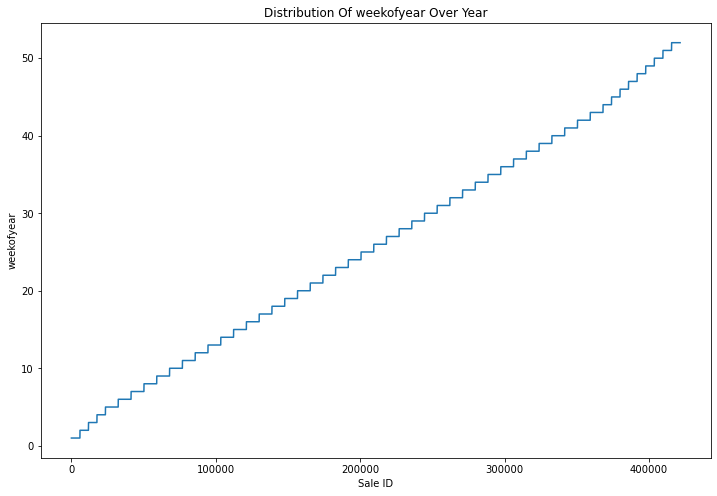

In [9]:
subset = data_sin_cos.copy() # over all data
fig,axe = plt.subplots(1,1,facecolor='white')

m_d = subset['weekofyear'].sort_values(ignore_index=True).plot(figsize=(12,8),kind='line')

m_d.set_title("Distribution Of weekofyear Over Year")
m_d.set_ylabel("weekofyear")
m_d.set_xlabel("Sale ID")

# check by iteration
def is_continuous(lst):
    return any((pred+1 != nxt and pred!= nxt) for pred,nxt in zip(lst,lst[1:]))

print('False' if is_continuous(subset['weekofyear'].sort_values(ignore_index=True).tolist()) else 'weekofyear is continuous')

In [10]:
df = pd.concat([df,data_sin_cos],axis=1)
df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,split,Weekly_Sales,year,month,day,weekofyear,month_sin,month_cos,day_sin,day_cos
0,28,40,2012-01-06,0,50.43,3.599,5155.86,19549.51,218.29,636.73,...,test,NaN,2012,1,6,1,0.500000,8.660254e-01,0.937752,0.347305
1,18,93,2012-03-09,0,38.10,3.876,7410.18,368.19,25.46,1852.39,...,test,NaN,2012,3,9,10,1.000000,6.123234e-17,0.968077,-0.250653
2,38,4,2011-05-27,0,76.67,4.087,NaN,NaN,NaN,NaN,...,test,NaN,2011,5,27,21,0.500000,-8.660254e-01,-0.724793,0.688967
3,29,33,2010-03-12,0,43.43,2.805,NaN,NaN,NaN,NaN,...,test,NaN,2010,3,12,10,1.000000,6.123234e-17,0.651372,-0.758758
4,13,52,2010-10-29,0,45.12,2.841,NaN,NaN,NaN,NaN,...,test,NaN,2010,10,29,43,-0.866025,5.000000e-01,-0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,27,18,2012-10-19,0,56.53,4.153,2639.32,NaN,4.77,575.48,...,train,20775.91,2012,10,19,42,-0.866025,5.000000e-01,-0.651372,-0.758758
421566,39,36,2010-05-21,0,76.67,2.826,NaN,NaN,NaN,NaN,...,train,5350.00,2010,5,21,20,0.500000,-8.660254e-01,-0.897805,-0.440394
421567,14,29,2010-04-30,0,53.15,2.921,NaN,NaN,NaN,NaN,...,train,10939.87,2010,4,30,17,0.866025,-5.000000e-01,-0.201299,0.979530
421568,15,90,2011-07-01,0,67.43,3.916,NaN,NaN,NaN,NaN,...,train,5013.89,2011,7,1,26,-0.500000,-8.660254e-01,0.201299,0.979530


In [11]:
ordinal_ecd = OrdinalEncoder(dtype='int64')

encoded = ordinal_ecd.fit_transform(df['Type'].to_numpy().reshape(-1,1))
df.loc[:,'Type'] = encoded
df.loc[:,'Type'] = df.loc[:,'Type'].astype('category')
df['Type']

0         0
1         1
2         2
3         1
4         0
         ..
421565    0
421566    0
421567    0
421568    1
421569    0
Name: Type, Length: 421570, dtype: category
Categories (3, int64): [0, 1, 2]

In [12]:
df_numeric = df[df['split'] == 'train'].loc[:,(df.dtypes == 'float64') | (df.dtypes == 'int64')]
df_numeric.columns

Index(['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'Weekly_Sales', 'year', 'month', 'day', 'month_sin', 'month_cos',
       'day_sin', 'day_cos'],
      dtype='object')

In [13]:
df.loc[:,'Store'] = df.loc[:,'Store'].astype('category')

In [14]:
df.loc[:,'Dept'] = df.loc[:,'Dept'].astype('category')
df_numeric['Dept'].nunique()

81

In [15]:
s_dept = df_numeric[['Dept','Weekly_Sales']]
s_dept

,Dept,Weekly_Sales
139119,92,87235.57
139120,22,5945.97
139121,28,1219.89
139122,9,11972.71
139123,55,8271.82
...,...,...
421565,18,20775.91
421566,36,5350.00
421567,29,10939.87
421568,90,5013.89


## 랜덤 포레스트

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse
from sklearn.metrics import accuracy_score

In [17]:
train = df.loc[df['split']=='train']
test = df.loc[df['split']=='test']

In [18]:
X = train[['Store','Dept','IsHoliday','Temperature','Fuel_Price','Type','Size','year','month']]
y = train["Weekly_Sales"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42,test_size=0.3)

In [20]:
forest = RandomForestRegressor(n_estimators=150, random_state=42,criterion='mse')
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [21]:
preds_train = forest.predict(X_train)
preds_validation = forest.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, preds_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, preds_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("훈련 세트 MSE : ", mse)
print("훈련 세트 RMSE : ", rmse)
print("훈련 세트 R2 : ", r2)

훈련 세트 정확도: 0.994
훈련 세트 MSE :  2869442.549287897
훈련 세트 RMSE :  1693.942900244249
훈련 세트 R2 :  0.9944507300664959


In [23]:
mse = mean_squared_error(preds_validation, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds_validation)

print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
print("테스트 세트 MSE: ", mse)
print("테스트 세트 RMSE : ", rmse)
print("테스트 세트 R2 : ", r2)

테스트 세트 정확도: 0.964
테스트 세트 MSE:  18012298.25675931
테스트 세트 RMSE :  4244.089803097869
테스트 세트 R2 :  0.9643466266329003


In [24]:
result = pd.DataFrame({'pred' : preds_validation, 'real' : y_test})
result.head()

,pred,real
144443,2943.259533,1929.57
358261,48370.955133,47753.37
174094,2298.392800,1843.30
154013,19845.838733,19055.36
391808,46877.892333,36066.03


In [26]:
result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
result.sort_index()

,pred,real,ratio(%)
139123,8014.196867,8271.82,3.114467
139125,18217.955667,18882.41,3.518906
139130,6846.816667,7114.49,3.762369
139131,120109.547067,150013.91,19.934393
139135,19438.515200,18882.82,2.942861
...,...,...,...
421545,13649.411733,13724.48,0.546966
421550,10365.721733,8465.22,22.450707
421561,1466.146600,1287.00,13.919705
421567,9666.741133,10939.87,11.637514


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

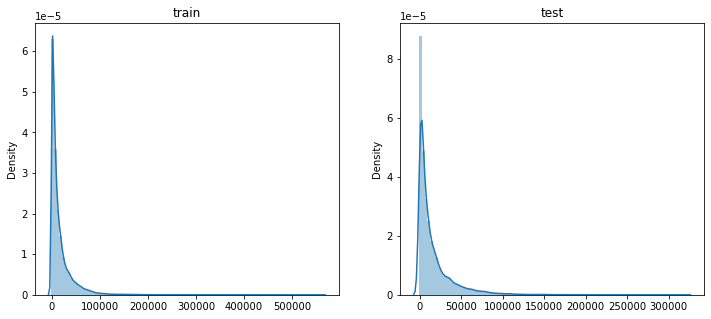

In [27]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(preds_train,ax=ax1,bins=100)
ax1.set(title="train")
sns.distplot(preds_validation,ax=ax2,bins=100)
ax2.set(title="test")

### Test set 예측하기

In [28]:
X_train = train[['Store','Dept','IsHoliday','Temperature','Fuel_Price','Type','Size','year','month']]
y_train = train["Weekly_Sales"]
X_test = test[['Store','Dept','IsHoliday','Temperature','Fuel_Price','Type','Size','year','month']]

In [29]:
preds_test = forest.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

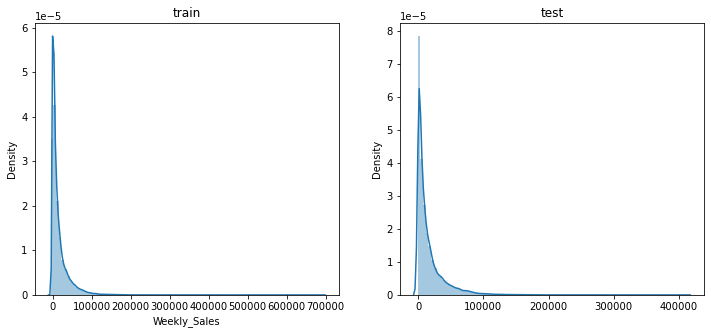

In [30]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=100)
ax1.set(title="train")
sns.distplot(preds_test,ax=ax2,bins=100)
ax2.set(title="test")